For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.


### Has the network latency gone up since we switched internet service providers?

- before switch/after switch(boolean), network latency (numeric, time)
- H_(0): The network latency has either decreased or not been affected by the change in internet provider.
- H_(A): it takes more time to load data after the switch in internet providers.

> True positive: it takes more time to load data after the switch in internet providers

> True negative: the amount of time it takes to load data has gone down or not been affected by the switch in internet providers

> Type I error: We say there is no relationship, even though latency has decreased

> Type II error: the network latency has increased, but we say the internet provider is independent 

#### notes:
 - type one error: latency did not go up, but we say that it did
 - type two error: saying latency has not gone up, but it has

### Is the website redesign any good?
> assuming people will spend more time on a website that is user friendly: 
> time spent on website(numeric), website redesign (boolean, before or after)
> is there an increase in time spent on the website since the redesign? 

- H_(0): The averge time spent on the redesign has either decreased or remained the same since the redesign
- H_(A): The average time users spend on the website has increased since the redesign.

> True positive: The averge time users spend on the website has increased and we conclude that the redesign is good

> True negative: The average time users spend on the website has decreased or remained the same and we conclude the redesgign is no good. 

> Type I error: The average time users spend on the website has decreased or remained the same and we conclude the redesgign is good. 

> Type II error: The averge time users spend on the website has increased and we conclude that the redesign is no good

#### notes:

### Is our television ad driving more sales?
> assuming exposure to the add will increase sales
> continnuous vs. continuous, we are testing for positive linear correlation

- H_(0): there is no relationship at all between ad exposure and sales or there is a negative linear relationship between ad exposure and likelihood to make a purchase
- H_(A): our television ad is driving more sales, the more someone sees it the more likely they are to make a purchase


> True positive: post-ad sales are higher than pre-ad sales, we will keep the ad. 

> True negative: we accept the pre-ad sales are greater than the post-ad sales, we change or remove the ad. 

> Type I error: there is a negative linear relationship bewteen exposure to our ad and liklihood to make a purchase, but we will continue exposure because we are stubborn and the boss likes it.

> Type II error: our amazing tv ad is working to increase sales but we are going to chnage it anyways.

#### notes:

# Exercises 

## 1: Answer with the type of test you would use (assume normal distribution):

#Is there a difference in grades of students on the second floor compared to grades of all students?
 - i would conduct a one sample t-test

#Are adults who drink milk taller than adults who dont drink milk?
- independent t-test

#Is the the price of gas higher in texas or in new mexico?
- independent t-test

#Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
- ANOVA

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance. we are testing for a difference in time.

In [27]:
# pyplot for plotting
import matplotlib.pyplot as plt
# numpy for vectorized array operations
import numpy as np
# pandas for proper tabular manipulation
import pandas as pd
# scipy stats for our subversions
from scipy import stats
from pydataset import data

In [ ]:
# H_0: there is no difference in the amount of time each office takes to sell a house
# H_a : there is significant difference in the amount of time it takes the offices to sell houses

In [18]:
alpha = 0.05

In [4]:
O1_mu = 90
O1_sigma = 15

In [7]:
O1_sales = stats.norm(O1_mu, O1_sigma)

In [11]:
O1_sales_array = O1_sales.rvs(40)

In [12]:
O2_mu = 100
O2_sigma = 20
O2_sales = stats.norm(O2_mu, O2_sigma)

In [13]:
O2_sales_array = O2_sales.rvs(50)

In [14]:
print(O1_sales_array.var())
print(O2_sales_array.var())

235.2903370449606
429.400545236213


In [15]:
t, p = stats.ttest_ind(O1_sales_array, O2_sales_array, equal_var = False)

In [16]:
t, p

(-1.7790599603429762, 0.07870044988755845)

In [20]:
print("Reject $H_{0}$? ", p < alpha)

Reject $H_{0}$?  False


## Exercise 3

In [28]:
mpg = data('mpg')

In [29]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [37]:
# A Plot distribution
mpg['fuel_efficiency'] = (mpg.cty + mpg.hwy) /2 

In [38]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fule_efficiency,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


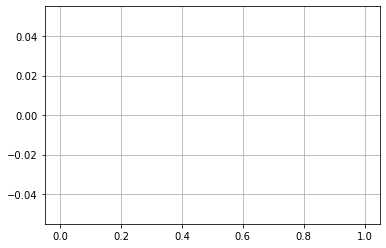

In [41]:
mpg[mpg.year == '1999'].fuel_efficiency.hist()
plt.show()

In [42]:
cars_99 = mpg[mpg.year == '1999'].fuel_efficiency()
cars_08 = mpg[mpg.year == '2008'].fuel_efficiency()

TypeError: 'Series' object is not callable